# Simple Linear Regression

### **Analyze healthexp data from seaborn's dataset**
- **Independent Variable (X)**: Spending_USD  
- **Dependent Variable (Y)**: Life_Expectancy  

### 1. Analyze the Relationship
### 2. Apply Simple Linear Regression
### 3. Perform Simultant Test (F-Test) and Partial Test (T-Test)
### 4. Interpret the result
### 5. Use α 5%  (α = 0.05)


* https://www.statsmodels.org/stable/index.html
* https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
* https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
* https://docs.python.org/3/library/warnings.html

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## The data concerns health expenditure and life expectancy.
The dataset provides information about:
- **Spending_USD**: Health expenditure per capita in USD  
- **Life_Expectancy**: The average life expectancy (in years) of a country  

In [3]:
df = sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [5]:
# drop missing value
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [7]:
df[['Spending_USD', 'Life_Expectancy']].describe()

,Spending_USD,Life_Expectancy
count,274.000000,274.000000
mean,2789.338905,77.909489
std,2194.939785,3.276263
min,123.993000,70.600000
25%,1038.357000,75.525000
50%,2295.578000,78.100000
75%,4055.610000,80.575000
max,11859.179000,84.700000


# **Relationship (Correlation)**

In [8]:
# Correlation: mpg vs horsepower
df[['Spending_USD', 'Life_Expectancy']].corr()

,Spending_USD,Life_Expectancy
Spending_USD,1.00000,0.57943
Life_Expectancy,0.57943,1.00000


## Interpretasi Korelasi
- Korelasi (Spending_USD, Life_Expectancy) = **0.579**

- Nilai korelasi **positif (0.579)** → menunjukkan hubungan **searah**.  
  Artinya, semakin besar pengeluaran kesehatan per kapita (Spending_USD), cenderung semakin tinggi pula angka harapan hidup (Life_Expectancy).


* https://seaborn.pydata.org/generated/seaborn.regplot.html

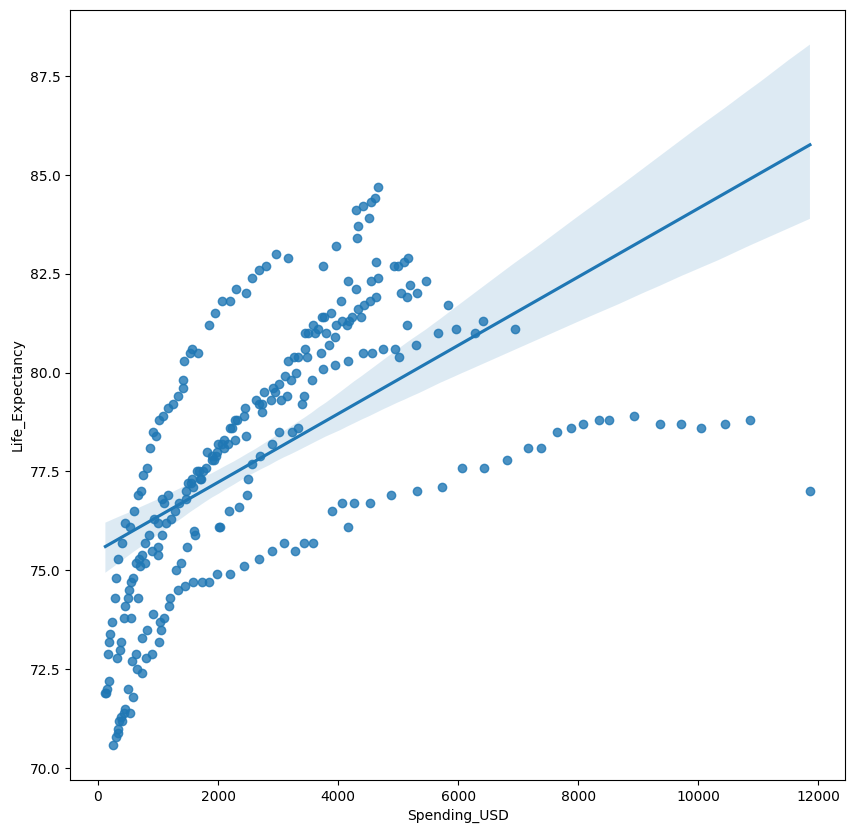

In [9]:
# Regression Plot
plt.figure(figsize=(10,10))
sns.regplot(x = 'Spending_USD', y = 'Life_Expectancy', data = df);

# **Simple Linear Regression**

* https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

Untuk mengaplikasikan **Simple Linear Regression** pada dataset sesuai dengan instruksi soal, berarti:

- **X (Independent Variable)**: Spending_USD  
- **y (Dependent Variable)**: Life_Expectancy

In [10]:
X = df['Spending_USD']
y = df['Life_Expectancy']

In [11]:
# ditambahkan constant
sm_lm = sm.OLS(df['Life_Expectancy'], sm.add_constant(df[['Spending_USD']]))

# Fitting (model belajar dari training set)
result = sm_lm.fit()

In [12]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     137.5
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           5.70e-26
Time:                        11:06:13   Log-Likelihood:                -657.40
No. Observations:                 274   AIC:                             1319.
Df Residuals:                     272   BIC:                             1326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           75.4970      0.262    288.562   

# **Interpretasi F-test dan T-test**

### **F-test**
* Nilai F-test statistic digunakan untuk melihat apakah ada pengaruh signifikan antara **Spending_USD** terhadap **Life_Expectancy**.  
* Dengan kata lain, apakah belanja kesehatan berpengaruh signifikan dalam menjelaskan variasi harapan hidup?  

**Hipotesis:**  
- H0: Spending_USD tidak berpengaruh signifikan terhadap Life_Expectancy  
- H1: Spending_USD berpengaruh signifikan terhadap Life_Expectancy  

**Keputusan:**  
- Jika nilai **Prob (F-statistic)** < 0.05, maka H0 ditolak.  
- Artinya, terdapat cukup bukti bahwa Spending_USD berpengaruh signifikan terhadap Life_Expectancy.  

---

### **T-test**

- **B0 (Intercept)**: konstanta model  
- **B1 (Spending_USD)**: koefisien regresi  

**Hipotesis:**  
- H0: β = 0 (koefisien tidak signifikan)  
- H1: β ≠ 0 (koefisien signifikan)  

**Keputusan:**  
- Jika **p-value < 0.05**, maka H0 ditolak.  
- Interpretasi:  
  - Jika p-value B0 < 0.05 → intercept dibutuhkan dalam model.  
  - Jika p-value B1 < 0.05 → Spending_USD berpengaruh signifikan terhadap Life_Expectancy.  

---

### **Interpretasi Coeff**

Misalkan hasil regresi memberikan persamaan:  

\[
Life\_Expectancy = \beta_0 + \beta_1 \cdot Spending\_USD
\]

- **β0 (Intercept)** → nilai Life_Expectancy ketika Spending_USD = 0 (biasanya hanya interpretasi matematis, tidak realistis secara praktis).  
- **β1 (Slope)** → perubahan pada Life_Expectancy untuk setiap kenaikan 1 satuan Spending_USD.  
  - Jika β1 bernilai positif → semakin tinggi Spending_USD, semakin tinggi Life_Expectancy.  
  - Jika β1 bernilai negatif → semakin tinggi Spending_USD, semakin rendah Life_Expectancy.  

---

### **R-squared**

- R² menunjukkan seberapa besar variasi Life_Expectancy dapat dijelaskan oleh Spending_USD.  
- Contoh: jika R² = 0.58, berarti **58% variasi Life_Expectancy dapat dijelaskan oleh Spending_USD**, sedangkan sisanya dipengaruhi faktor lain.  


# **Melihat nilai hasil prediksi dari model**

In [13]:
X

0        252.311
1        192.143
2        123.993
3        150.437
4        326.961
         ...    
269     6938.983
270     5468.418
271     5018.700
272     4665.641
273    11859.179
Name: Spending_USD, Length: 274, dtype: float64

In [14]:
y

0      70.6
1      72.2
2      71.9
3      72.0
4      70.9
       ... 
269    81.1
270    82.3
271    80.4
272    84.7
273    77.0
Name: Life_Expectancy, Length: 274, dtype: float64

In [15]:
# Nilai mpg actual
y_true = y.reset_index().drop(columns='index')
y_true

,Life_Expectancy
0,70.6
1,72.2
2,71.9
3,72.0
4,70.9
...,...
269,81.1
270,82.3
271,80.4
272,84.7


In [16]:
df[['Spending_USD']]

,Spending_USD
0,252.311
1,192.143
2,123.993
3,150.437
4,326.961
...,...
269,6938.983
270,5468.418
271,5018.700
272,4665.641


In [17]:
# Nilai mpg hasil prediksi
y_predict = result.predict()
yhat = pd.DataFrame(data=y_predict, columns=['prediction'])
yhat

,prediction
0,75.715256
1,75.663218
2,75.604276
3,75.627147
4,75.779819
...,...
269,81.498447
270,80.226580
271,79.837626
272,79.532271


In [18]:
df['y_hat'] = yhat
df

,Year,Country,Spending_USD,Life_Expectancy,y_hat
0,1970,Germany,252.311,70.6,75.715256
1,1970,France,192.143,72.2,75.663218
2,1970,Great Britain,123.993,71.9,75.604276
3,1970,Japan,150.437,72.0,75.627147
4,1970,USA,326.961,70.9,75.779819
...,...,...,...,...,...
269,2020,Germany,6938.983,81.1,81.498447
270,2020,France,5468.418,82.3,80.226580
271,2020,Great Britain,5018.700,80.4,79.837626
272,2020,Japan,4665.641,84.7,79.532271


In [19]:
df[['Spending_USD', 'Life_Expectancy','y_hat']]

,Spending_USD,Life_Expectancy,y_hat
0,252.311,70.6,75.715256
1,192.143,72.2,75.663218
2,123.993,71.9,75.604276
3,150.437,72.0,75.627147
4,326.961,70.9,75.779819
...,...,...,...
269,6938.983,81.1,81.498447
270,5468.418,82.3,80.226580
271,5018.700,80.4,79.837626
272,4665.641,84.7,79.532271


In [20]:
y_merged = [y_true, yhat]

pd.concat(y_merged, axis=1, join='inner')

,Life_Expectancy,prediction
0,70.6,75.715256
1,72.2,75.663218
2,71.9,75.604276
3,72.0,75.627147
4,70.9,75.779819
...,...,...
269,81.1,81.498447
270,82.3,80.226580
271,80.4,79.837626
272,84.7,79.532271


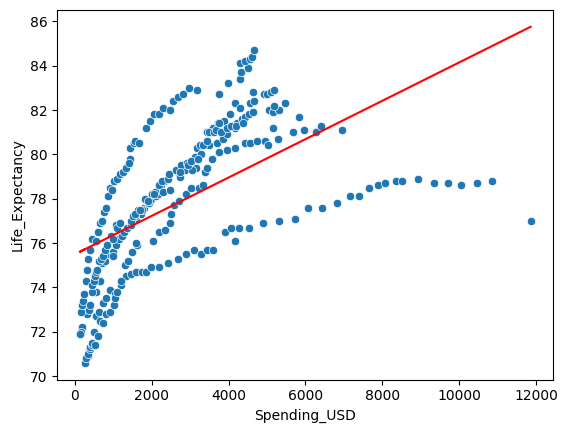

In [23]:
# titik biru: nilai mpg actual
sns.scatterplot(x = 'Spending_USD', y = 'Life_Expectancy', data = df)

# garis merah: fungsi regresi (nilai prediksi mpg)
plt.plot(df['Spending_USD'], yhat, color='r') # y = 39.93 + -0.1578 x

## **Cek nilai RMSE model (cost function)**

In [22]:
from statsmodels.tools.eval_measures import rmse

rmse = rmse(y_true, yhat)
rmse

# satuan RMSE mengacu pada satuan variabel y (dalam kasus ini mpg)

array([2.66534863])